Bifurcation diagram implementation

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from PIL import Image
from tqdm import tqdm
%matplotlib inline

from IPython.display import HTML
from base64 import b64encode

def display(filename):
  if filename.endswith("png"):
    mp4 = open(filename,'rb').read()
    data_url = "data:image/png;base64," + b64encode(mp4).decode()
    return HTML("""
    <img width=400  src="%s" />
    """ % data_url)
  elif filename.endswith("mp4"):
    mp4 = open(filename,'rb').read()
    data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
    return HTML("""
    <video width=400 controls>
          <source src="%s" type="video/mp4">
    </video>
    """ % data_url)


# logistic_map
def f(x, r):
  return r * x * (1-x)

def bifurcation_diagram(x0=0.5,
  skipPlot=1000, 
  plotNext=200, 
  plotWidth=500, 
  plotHeight=300, 
  rect=[0.25996, 0.61512, 3.426, 3.609],
  outputFilename = None):
  im = Image.new("RGB", [plotWidth, plotHeight], color= 'white')
  px = im.load()
  
  xMin, xMax = rect[0], rect[1]
  rMin, rMax = rect[2], rect[3]
  xStepSize = (xMax - xMin) / plotHeight
  rs = np.linspace(rMin, rMax, plotWidth)
  for i in range(len(rs)):
    r = rs[i]
    buckets = np.zeros(plotHeight)
    currX = x0
    for j in range(skipPlot+plotNext):
      currX = f(currX, r)
      if j<skipPlot:
        continue
      if xMin<=currX and currX<=xMax:
        p = int((currX - xMin) / xStepSize)
        p = min(max(0, p), plotWidth-1)
        buckets[p] += 1
    buckets = (buckets / 150 * 255.).astype(np.uint8)
    #print(max(buckets))
    for j in range(len(buckets)):
      if buckets[j] >=0.2:
        px[i,plotHeight-j-1] = (64,128,max(255-buckets[j],0))
      else:
        px[i,plotHeight-j-1] = (255,255,255)
  plt.axis('off')
  if outputFilename == None:
    plt.imshow(im)
  else:
    im.save(outputFilename)


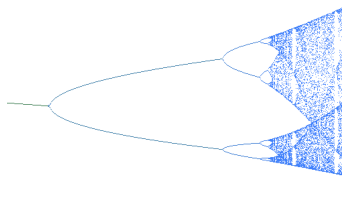

In [33]:
bifurcation_diagram(rect=[0.25996, 0.61512, 3.426, 3.609])

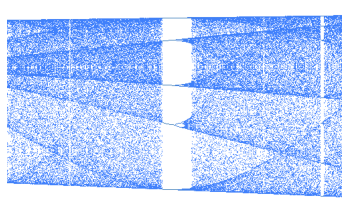

In [34]:
bifurcation_diagram(rect=[0.15144, 0.98015, 3.70302, 3.7789])

100%|██████████| 100/100 [01:15<00:00,  1.32it/s]


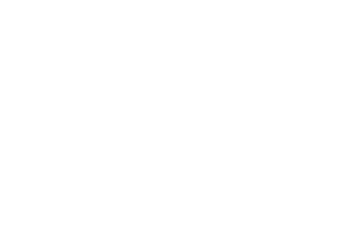

In [59]:
xMin = 0.15144-0.09
xMax = 0.98015-0.09
rMin = 3.70302
rMax = 3.7789
scale = 0.1

def zoom_in(xMin, xMax, rMin, rMax, scale):
  reduceInX = (xMax - xMin) * scale
  reduceInR = (rMax - rMin) * scale
  xMin += reduceInX / 2
  xMax -= reduceInX / 2
  rMin += reduceInR / 2
  rMax -= reduceInR / 2
  return xMin, xMax, rMin, rMax

for i in tqdm(range(100)):
  seqFilename = ("%4d.png" % i).replace(" ","0")
  bifurcation_diagram(rect=[xMin, xMax, rMin, rMax], outputFilename=seqFilename)
  xMin, xMax, rMin, rMax = zoom_in(xMin, xMax, rMin, rMax, scale)
  
#display("0000.png")


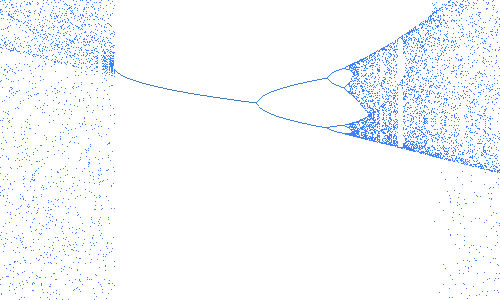

In [56]:
display("0099.png")

In [57]:
!ffmpeg -hide_banner -loglevel error -y -r 1/1 -start_number 0 -i %04d.png -c:v libx264 -r 25  bifurcation.mp4
!ls -al *.mp4
!rm *.png

-rw-r--r-- 1 root root  8129428 Apr 15 09:01 bifurcation360.mp4
-rw-r--r-- 1 root root 12779978 Apr 15 09:14 bifurcation.mp4


In [58]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
!cp bifurcation.mp4 /content/drive/MyDrive

Mounted at /content/drive
